In [9]:
!pip install segmentation_models
!pip install scikeras

Import statements

In [1]:
from model_utility import train_model
from model_utility import data_gather
from model_utility import define_model

import glob
import pandas as pd

Segmentation Models: using `keras` framework.


Testing Models

In [ ]:
SIZE_X = 1504
SIZE_Y =  224

accuracy = {}
for model_path in glob.glob('models/*.h5'):
    accuracy[model_path] = test_model(model_path, SIZE_X, SIZE_Y)[1]
    
print(accuracy)

Creating Models

In [ ]:
#########################################################
#Main
SIZE_X = 1504
SIZE_Y =  224
epoch_num = 30
batches = 1
X_train, Y_train, X_test, Y_test = data_gather(SIZE_X, SIZE_Y, training_path = "/datasets/")
training_size = len(X_train)


model_params = {"X_train": X_train,
               "Y_train": Y_train,
               "X_test": X_test, 
               "Y_test": Y_test,
               "epoch_num": epoch_num, 
               "batches": batches,
               "SIZE_X": SIZE_X,
               "SIZE_Y": SIZE_Y, 
               "training_size": training_size, 
               "backbone": "vgg16"}

#backbone_name_full = ['vgg16','vgg19']
backbone_name_full = ['vgg16','vgg19','resnet18','resnet34','resnet50','resnet101','resnet152','seresnet18','seresnet34',
                      'seresnet50','seresnet101','seresnet152','resnext50','resnext101','seresnext50','seresnext101', 'senet154',
                      'densenet121','densenet169','densenet201', 'inceptionv3', 'inceptionresnetv2', 'mobilenet', 'mobilenetv2',
                      'efficientnetb0','efficientnetb1','efficientnetb2','efficientnetb3','efficientnetb4','efficientnetb5',
                      'efficientnetb6','efficientnetb7']
#backbone_name_1 = ['vgg16','vgg19']#,'resnet18','resnet34','resnet50','resnet101','resnet152']#,'seresnet18','seresnet34']
#backbone_name_2 = ['seresnet50','seresnet101','seresnet152','resnext50','resnext101','seresnext50','seresnext101', 'senet154']
#backbone_name_3 = ['densenet121','densenet169','densenet201', 'inceptionv3', 'inceptionresnetv2', 'mobilenet', 'mobilenetv2']
#backbone_name_4 = ['efficientnetb0','efficientnetb1','efficientnetb2','efficientnetb3','efficientnetb4','efficientnetb5'
#                 ,'efficientnetb6','efficientnetb7']

epochs = ["epoch_"+str(i) for i in range(1,epoch_num+1)]
columns = ['backbone_name']+epochs


gridsearch_obj = {}
for backbone_name in backbone_name_full:
    print(f"running {backbone_name}... ") 
    model_params["backbone"] = backbone_name
    gridsearch_obj[backbone_name] = [train_model("models/", model_params)[1]]

print(gridsearch_obj)

df = pd.DataFrame(gridsearch_obj)

df.to_csv(f"spoke_{epoch_num}_backbone.csv")

In [43]:
import numpy as np

row = [0,1,0,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0]
top_28 = np.load("test.npy")

In [ ]:


def longest_seq(row):
    LS = {"x_start": 0,
      "x_end": 0,
      "y": 0,
      "biggest_sum": 0}

    seq_sum,x_end, x_start = 0,0,0
    for num in range(0,len(row)-1):
        print(f"current: {row[num]}, Prev: {row[num-1]}, seq_sum: {seq_sum}, x_start: {x_start}, x_end: {x_end}")

        if row[num] == 1:
            if seq_sum == 0:
                x_start = num
            seq_sum += 1
        if row[num] == 0 and row[num-1] == 1:
            x_end = num
            if LS["biggest_sum"] <= seq_sum:
                LS["biggest_sum"] = seq_sum
                LS["x_start"] = x_start
                LS["x_end"] = x_end
                x_end = 0
                x_start = 0
                seq_sum = 0
    return(LS)
print(longest_seq(top_28))


In [46]:
import numpy as np

row = [0,1,0,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0]
top_28 = np.load("test.npy")

def longest_seq(row):
    LS = {"x_start": 0,
      "x_end": 0,
      "y": 0,
      "biggest_sum": 0}

    seq_sum,x_end, x_start = 0,0,0
    for num in range(0,len(row)-1):
        if row[num] == 0:
            if seq_sum >= LS["biggest_sum"]:
                x_end = num-1
                LS["x_start"] = x_start
                LS["x_end"] = x_end
                LS["biggest_sum"] = seq_sum
            seq_sum,x_end, x_start = 0,0,0
        else:
            seq_sum+= 1
            if seq_sum == 1:
                x_start = num
            
                
            
    return(LS)
print(longest_seq(top_28))


{'x_start': 406, 'x_end': 1652, 'y': 0, 'biggest_sum': 1246}


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
test  = np.load("test2.npy")

In [62]:
# flat1 = test[int(len(test)/2)-1]
# flat2 = test[int(len(test)/2)]
# flat3 = test[int(len(test)/2)+1]

# flat = np.vstack((flat1, flat2, flat3))
flat = test.flatten()
print(flat)

[0. 0. 0. ... 0. 0. 0.]


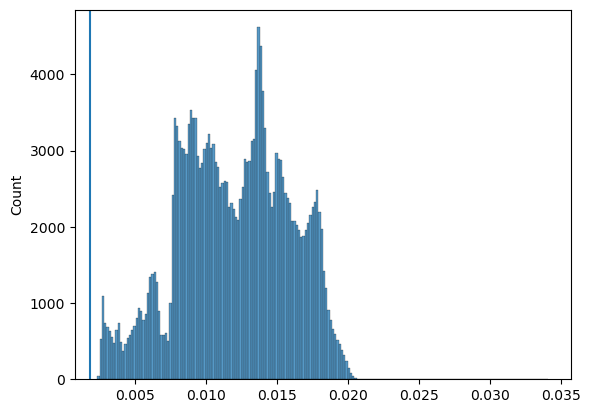

In [64]:
#flat = flat.flatten()
graph = sns.histplot(flat[flat != 0], bins=200)
graph.axvline(flat.mean()-flat.std())

0.00642
(199, 1582)


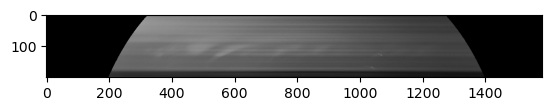

In [65]:
from preprocess_filter import apply_quantize

print(flat.std())
test[test < (flat.mean()-1*flat.std())] = 0
print(test.shape)
quant = apply_quantize(test)

plt.imshow(test, cmap = "gray")
plt.show()
# plt.imshow(quant, cmap = "gray")
# plt.show()